# Assignment 6 


This notebook contains the questions for Assignment 6. 

Please note, a random seed has been set to ensure the reproducibility of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

Make sure to complete this assignment individually and appropriately reference all external code and documentation used. ***In order for your submission to be valid, you must adhere to the function definitions which have been made (failure to do so will result in a grade of 0). You must upload this completed Jupyter Notebook file as your submission (other file types are not permitted and will result in a grade of 0).*** You are responsible for selecting and importing additional packages.

In [25]:
import numpy as np
np.random.seed(42)

In [26]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time

## Dataset Description

Attached with the assignment instructions, you will find the datasets.zip file. After unzipping the file, you will find two .csv files, where each file represents real-world measurement data of a heat experiment inside a steel furnace. "normal.csv" has all the normal experimental samples, while "anomalous.csv" has all the abnormal experimental samples.

In the datasets, the features are the vibration measurements in columns A, B, ... , H, which correspond to (X1, X2, ... , X8) measurement signals. Each feature represents a vibration signal inside the furnace at several frequency bands. Each example is a measurement recorded at a time instance (Timestamp), which are considered time-series data measurements.

## Question 1 - Data Preparations [10 Marks]

A) Read "normal.csv" as a pandas dataframe "normalData", and print out the shape of the normal dataset.

B) Read "anomalous.csv" as a pandas dataframe "anomalousData", and print out the shape of the nomalous dataset.


In [27]:
### Q1A) - 5pts
normalData = pd.read_csv('datasets/normal.csv')
print(normalData.shape)
normalData.head()

(76593, 10)


,Timestamp,X1,X2,X3,X4,X5,X6,X7,X8,Anomaly_Tag
0,622,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106,0
1,623,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243,0
2,624,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227,0
3,625,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509,0
4,626,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580,0


In [28]:
### Q1B) - 5pts
anomalousData = pd.read_csv('datasets/anomalous.csv')
print(anomalousData.shape)
anomalousData.head()

(2599, 10)


,Timestamp,X1,X2,X3,X4,X5,X6,X7,X8,Anomaly_Tag
0,1378,0.76356,6.0467,391.61,523.48,0.92730,1.51430,6.5917,2.5061,1
1,1379,0.76313,6.0146,389.44,519.34,0.91443,1.42520,6.6227,2.5104,1
2,1382,0.73073,5.8869,380.79,500.64,0.52303,0.97201,6.8065,2.6115,1
3,1383,0.72927,5.8573,377.56,495.20,0.57328,1.00660,6.7078,2.5449,1
4,1384,0.72876,5.8050,373.35,488.55,0.57355,1.00810,6.5600,2.4355,1


## Question 2 - Supervised Learning Algorithms [50 Marks]

A) Complete the myTrainTestSplit function, which takes as input **two dataframes** consisting of the normal and anomalous datasets, reserves 30 percent of each dataframe for testing and **returns 4 variables, Xtrain, Xtest, ytrain, and ytest**. 

*Note: you can use `concat` from pandas library to concatenade trainig sets from two dataframes, and test sets from two dataframes.*


B) Apply a Decision Tree model for classifying the events as normal or anomalous. Fill in the myDecisionTree function, which accepts as input the training set and returns a fully trained model. 

C) Apply a Bagging model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myBagging function, which accepts as input the training set and returns a fully trained model. 

D) Apply a Random Forest model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myRandomForest function, which accepts as input the training set and returns a fully trained model. 

E) Based on the trained Random Forest model from 2D, use a horizontal bar plot to plot the feature importance scores of all features (Timestamp, X1-X8).

F) Fill in the myEvaluateSupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 2B, 2C, and 2D within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your models using 3 metrics of `Recall`, `Preceision` and `f1 score`. Return three numpy arrays consisting of the three metrics calculated for each model on the test set and print them out. 
- Also, print out the confusion matrix of your three models on the test set. 

G) **Written Answer** - Use the markdown cell to answer the following:
- Justify the choice of three metrics for the evaluation of the model's performance.
- Compare the performance and training time of the Decision Tree and Bagging models and discuss the reasons for the performance difference.
- Compare the performance and training time of the Bagging and Random Forest models and discuss the reasons for the performance difference.

In [29]:
### Q2A) - 5pts 
def myTrainTestSplit(df1 ,df2):
    X1 = df1.drop(columns=['Anomaly_Tag'])
    y1 = df1['Anomaly_Tag']
    
    X2 = df2.drop(columns=['Anomaly_Tag'])
    y2 = df2['Anomaly_Tag']
    
    Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
    Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
    
    Xtrain = pd.concat([Xtrain1, Xtrain2], ignore_index=True)
    Xtest = pd.concat([Xtest1, Xtest2], ignore_index=True)
    ytrain = pd.concat([ytrain1, ytrain2], ignore_index=True)
    ytest = pd.concat([ytest1, ytest2], ignore_index=True)
    
    return Xtrain, Xtest, ytrain, ytest

Xtrain, Xtest, ytrain, ytest = myTrainTestSplit(normalData, anomalousData)

In [30]:
### Q2B) - 5pts
def myDecisionTree(Xtrain, ytrain):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(Xtrain, ytrain)
    return model


In [31]:
### Q2C) - 5pts
def myBagging(Xtrain, ytrain):
    base_model = DecisionTreeClassifier(random_state=42)
    model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
    model.fit(Xtrain, ytrain)
    return model


In [32]:
### Q2D) - 5pts
def myRandomForest(Xtrain, ytrain):
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(Xtrain, ytrain)
    return model

random_forest = myRandomForest(Xtrain, ytrain)

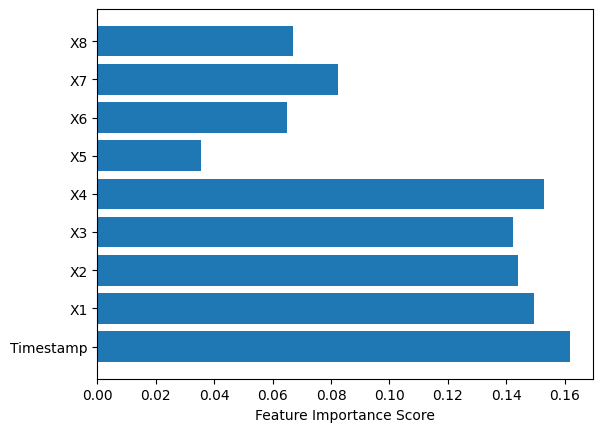

In [33]:
from matplotlib import pyplot as plt

### Q2E) - 10pts
feature_importance = random_forest.feature_importances_
features = Xtrain.columns

plt.barh(features, feature_importance)
plt.xlabel('Feature Importance Score')
plt.show()

In [34]:
### Q2F) - 10pts
def myEvaluateSupervisedModelPerformance(Xtrain, ytrain, Xtest, ytest):
    # Decision Tree
    t0_dt = time.time()
    model_dt = myDecisionTree(Xtrain, ytrain)
    t1_dt = time.time()
    
    ypred_dt = model_dt.predict(Xtest)
    dt_rscore = recall_score(ytest, ypred_dt)
    dt_pscore = precision_score(ytest, ypred_dt)
    dt_f1score = f1_score(ytest, ypred_dt) 
    dt_cm = confusion_matrix(ytest, ypred_dt)
    
    # Bagging Model
    t0_bm = time.time()
    model_bm = myBagging(Xtrain, ytrain)
    t1_bm = time.time()
    
    ypred_bm = model_bm.predict(Xtest)
    bm_rscore = recall_score(ytest, ypred_bm)
    bm_pscore = precision_score(ytest, ypred_bm)
    bm_f1score = f1_score(ytest, ypred_bm) 
    bm_cm = confusion_matrix(ytest, ypred_bm)
    
    # Random Forest
    t0_rf = time.time()
    model_rf = myRandomForest(Xtrain, ytrain)
    t1_rf = time.time()
    
    ypred_rf = model_rf.predict(Xtest)
    rf_rscore = recall_score(ytest, ypred_rf)
    rf_pscore = precision_score(ytest, ypred_rf)
    rf_f1score = f1_score(ytest, ypred_rf) 
    rf_cm = confusion_matrix(ytest, ypred_rf)
    
    print(f'Decision Tree model took {t1_dt - t0_dt} sec to train')
    print(f'Bagging model took {t1_bm - t0_bm} sec to train')
    print(f'Random Forest model took {t1_rf - t0_rf} sec to train')
    
    print('\nDecision Tree:')
    print(f'Recall: {dt_rscore}')
    print(f'Precision: {dt_pscore}')
    print(f'F1 Score: {dt_f1score}')
    print('Confusion Matrix:')
    print(dt_cm)
    
    print('\nBagging Model:')
    print(f'Recall: {bm_rscore}')
    print(f'Precision: {bm_pscore}')
    print(f'F1 Score: {bm_f1score}')
    print('Confusion Matrix:')
    print(bm_cm)
    
    print('\nRandom Forest:')
    print(f'Recall: {rf_rscore}')
    print(f'Precision: {rf_pscore}')
    print(f'F1 Score: {rf_f1score}')
    print('Confusion Matrix:')
    print(rf_cm)
    
    return np.array([dt_rscore, bm_rscore, rf_rscore]), np.array([dt_pscore, bm_pscore, rf_pscore]), np.array([dt_f1score, bm_f1score, rf_f1score])

recalls, precisions, f1_scores = myEvaluateSupervisedModelPerformance(Xtrain, ytrain, Xtest, ytest)

Decision Tree model took 0.42627620697021484 sec to train
Bagging model took 2.4265222549438477 sec to train
Random Forest model took 1.018664836883545 sec to train

Decision Tree:
Recall: 0.9141025641025641
Precision: 0.8991172761664565
F1 Score: 0.9065479974570884
Confusion Matrix:
[[22898    80]
 [   67   713]]

Bagging Model:
Recall: 0.9217948717948717
Precision: 0.9809004092769441
F1 Score: 0.9504296100462657
Confusion Matrix:
[[22964    14]
 [   61   719]]

Random Forest:
Recall: 0.882051282051282
Precision: 0.9927849927849928
F1 Score: 0.9341479972844535
Confusion Matrix:
[[22973     5]
 [   92   688]]


#### Q2G) - 10 pts

**Witten Answer:** The recall metric is used because, it helps in assessing the model's ability to identify as many anomalous events as possible. Precision provides an indication of how many of the predicted positive instances are truly anomalous. The F1 score provides an in between and is a good overall measure of the model's performance.

The Bagging model shows higher recall, precision, and F1 score compared to the Decision Tree model. The bagging model helps reduce overfitting by training multiple base models on different subsets of the training data and aggregating their predictions.

Random Forest achieved comparable performance to Bagging with a shorter training time. Random Forest introduces additional randomness through feature selection, contributing to its efficiency.

## Question 3 - Dimensionality Reduction [40 Marks]

A) Build the pipeline that uses a Principal Component Analysis (PCA) model to extract 2 principal components of the training set and create a a Random Forest model that consists of 50 base decision trees (same as the model in 2D).  Fill in the myPCARF function, which accepts as input the training set and returns a fully trained model. 

B) Fill in the myEvaluateUnsupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 3A within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your model on the test set using the 3 same metrics from 2F. Return three numpy arrays consisting of the three metrics calculated for the model and print them out. 
- Also, print out the confusion matrix of your model on the test set. 

*Note: This function can be the same as the function from 2F, but remember to change the model name.*

C) **Written Answer** - Use the markdown cell to answer the following:
- Compare the performance and training time of PCA + Random Forest model from 3A and the Random Forest model from 2D, and discuss the reasons for the performance difference.

In [35]:
### Q3A) - 10pts
def myPCARF(Xtrain, ytrain):
    pipeline = Pipeline([
        ('pca', PCA(n_components=2, random_state=42)),
        ('random_forest', RandomForestClassifier(n_estimators=10, random_state=42))
    ])
    pipeline.fit(Xtrain, ytrain)
    return pipeline

In [36]:
### Q3B) - 5pts
def myEvaluateUnsupervisedModelPerformance(Xtrain, ytrain, Xtest, ytest):
    t0_pca_rf = time.time()
    model_pca_rf = myPCARF(Xtrain, ytrain)
    t1_pca_rf = time.time()
    
    ypred_pca_rf = model_pca_rf.predict(Xtest)
    pca_rf_rscore = recall_score(ytest, ypred_pca_rf)
    pca_rf_pscore = precision_score(ytest, ypred_pca_rf)
    pca_rf_f1score = f1_score(ytest, ypred_pca_rf) 
    pca_rf_cm = confusion_matrix(ytest, ypred_pca_rf)
    
    print(f'PCA Random Forest model took {t1_pca_rf - t0_pca_rf} sec to train')
    print(f'Recall: {pca_rf_rscore}')
    print(f'Precision: {pca_rf_pscore}')
    print(f'F1 Score: {pca_rf_f1score}')
    print('Confusion Matrix:')
    print(pca_rf_cm)
    
    return np.array([pca_rf_rscore, pca_rf_pscore, pca_rf_f1score])

scores = myEvaluateUnsupervisedModelPerformance(Xtrain, ytrain, Xtest, ytest)

PCA Random Forest model took 0.5593910217285156 sec to train
Recall: 0.39871794871794874
Precision: 0.6775599128540305
F1 Score: 0.5020177562550444
Confusion Matrix:
[[22830   148]
 [  469   311]]


#### Q3C) - 10 pts

**Written Answer:** The model from 2D took significantly less time to train, and performed much better than the model in 3A on the recall, precision, and F1 score. PCA is for dimensionality reduction, and reducing the feature space can lead to information loss.